RMSE: 21.86
R² Score: 0.946


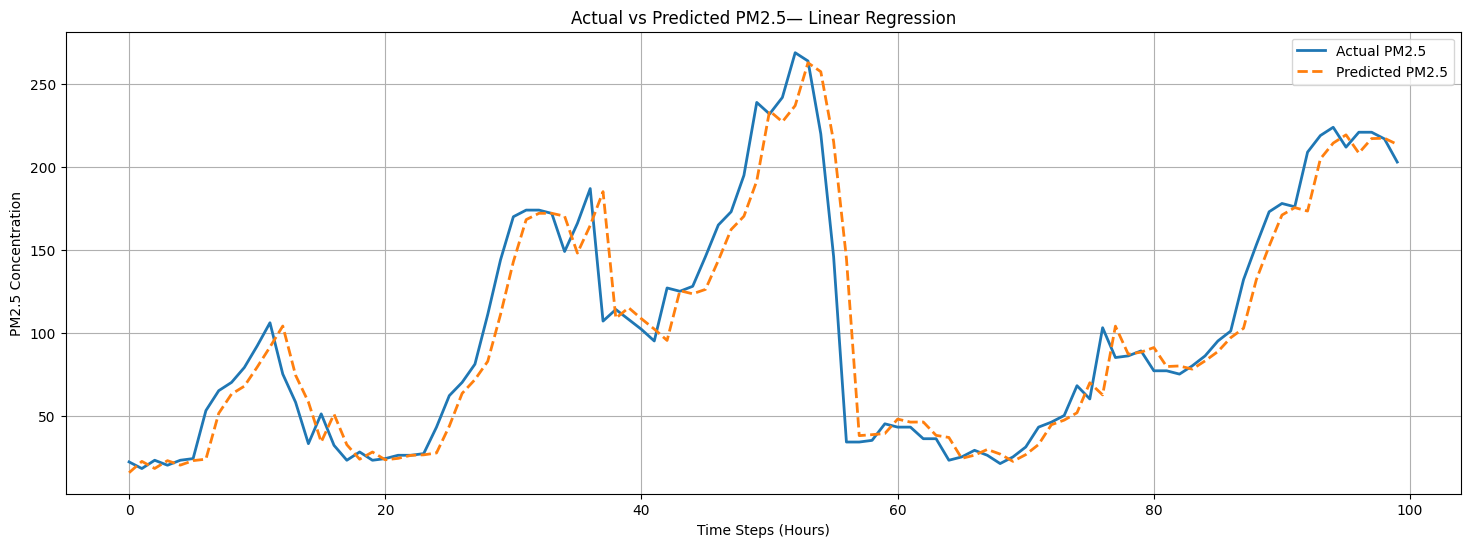

 graph saved successfully.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import os

df = pd.read_csv(r"C:\Users\srust\Downloads\data.csv")
df = df.rename(columns={"pm2.5": "pm25"})
df = df.ffill().bfill()

features = ["pm25", "DEWP", "TEMP", "PRES", "Iws", "Is", "Ir"]
data = df[features]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

X = scaled[:-1]         
y = scaled[1:, 0]       

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


def inverse_pm25(vals):
    dummy = np.zeros((len(vals), scaled.shape[1]))
    dummy[:, 0] = vals
    return scaler.inverse_transform(dummy)[:, 0]

y_test_inv = inverse_pm25(y_test)
y_pred_inv = inverse_pm25(y_pred)


rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


POINTS = 100
output_dir = r"C:\Users\srust\OneDrive\Desktop\LINEAR_REGRESSION_OUTPUT"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(18,6))
plt.plot(y_test_inv[:POINTS], label="Actual PM2.5", linewidth=2)
plt.plot(y_pred_inv[:POINTS], label="Predicted PM2.5", linewidth=2, linestyle="--")

plt.title("Actual vs Predicted PM2.5— Linear Regression")
plt.xlabel("Time Steps (Hours)")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)

plt.savefig(rf"{output_dir}\actual_vs_predicted_6000_lr.png",
            dpi=300, bbox_inches="tight")
plt.show()

print(" graph saved successfully.")
